In [1]:
## Our standard import
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import joblib

# ## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

In [2]:
loaded_joblib = joblib.load('random_forest.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor'])

In [5]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
reg = loaded_joblib['RandomForestRegressor']

# Explain your tree-based model with shap:

In [6]:
import shap
shap.initjs()

In [7]:
len(X_train_df)

6392

In [8]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4469,7.72,0.074669,76.3986,1987.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4438,5.11,0.034868,163.8210,2004.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
366,8.05,0.078386,256.4646,2004.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2219,8.76,0.050131,128.3336,1999.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6080,6.59,0.176748,82.7908,1998.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 


4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
215      131.1626
4680    2251.0698
1288    1834.9448
3635     759.0120
7936    4074.6960
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [12]:
explainer = shap.Explainer(reg)
explainer

In [13]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)


shap._explanation.Explanation

In [14]:
X_shap.shape



(400, 30)

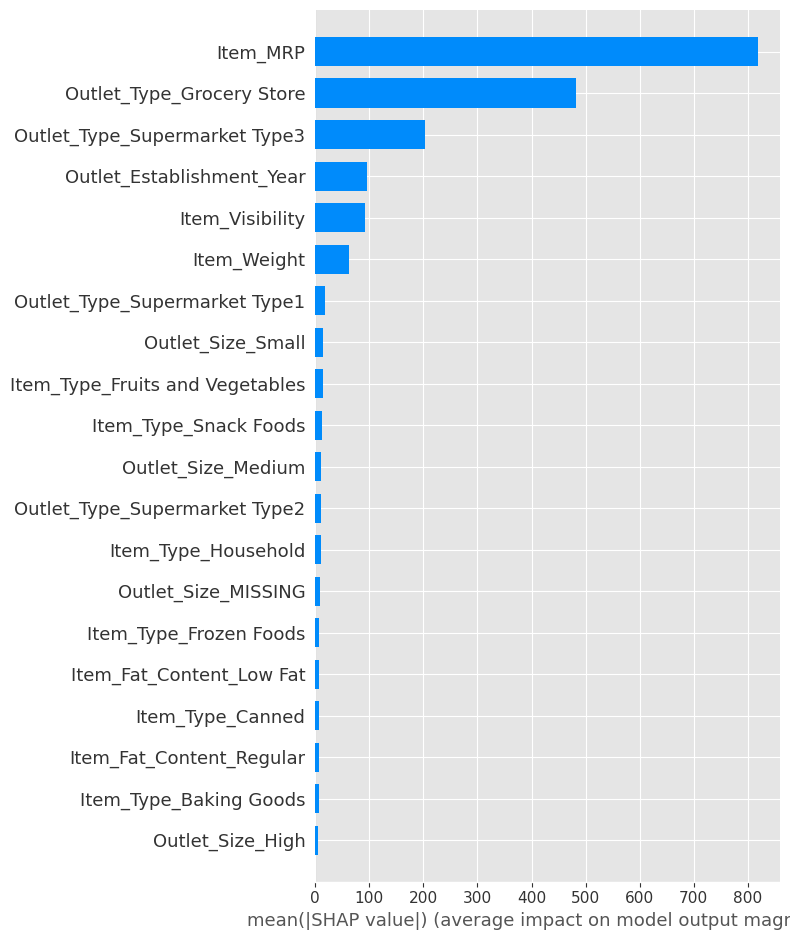

In [22]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
#saving the summary plot
fig.savefig('Data/summary_plot_rf.png', bbox_inches="tight")

display feature importance image

<img src="https://github.com/ivyyyyyliu/Food-Sales-Prediction/blob/main/Data/importances.png"/>


They are not exactly the same, the first and the second are the same. In shap, the supermarket type 3 go up in to third place.
The item visibility went down to the last. However, we have new feature - Establishment Year.

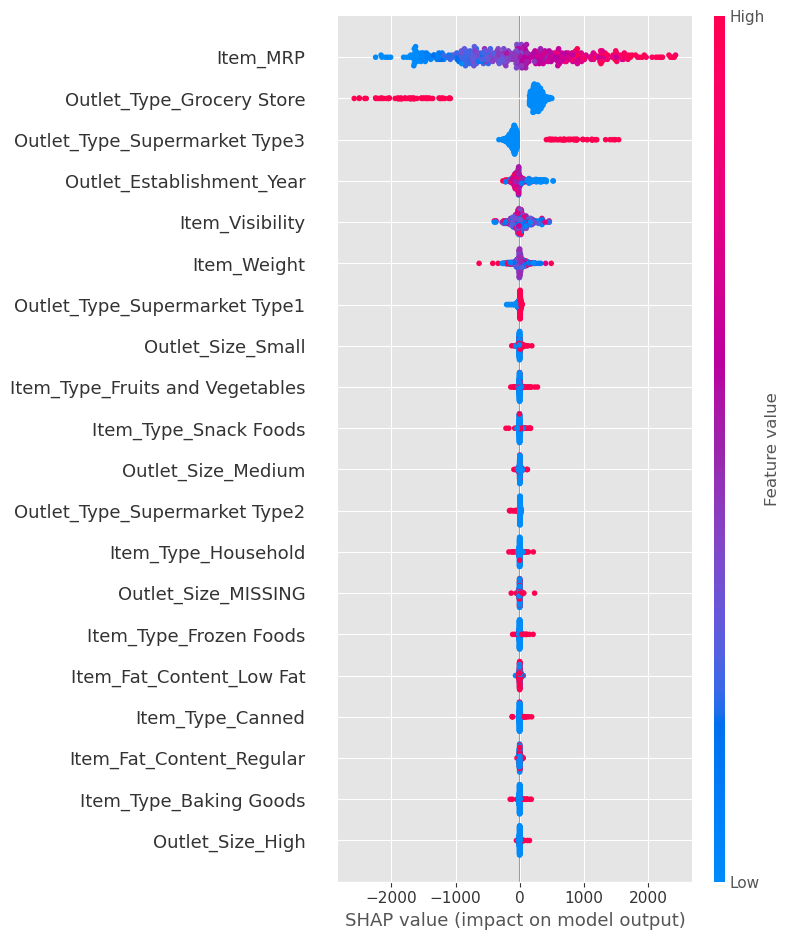

In [23]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features = X_shap,plot_type='dot')
#saving
fig.savefig('Data/summary_plot_dot.png');

# Top 3 most important features

- Item MRP:
    - The Sales will be higher if the items prices are higher
- Outlet type Grocery Store
    - it will affect sales.
- Outlet type Supermarket Type 3
    - more supermarket type 3, it will increasing more sales. 